In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import SelectFromModel


In [15]:
def load_sensor_data(file_path):
    """
    Robust method to load sensor data with multiple parsing strategies
    """
    try:
        # Strategy 1: Direct loading with explicit parsing
        df = pd.read_csv(
            file_path, 
            comment='%',  # Ignore comment lines
            header=None,  # No header
            names=['TimeStamp', 'Sample_No', 'X_Axis', 'Y_Axis', 'Z_Axis', 'Sensor_Type', 'Sensor_ID'],
            dtype={
                'TimeStamp': float,
                'Sample_No': int,
                'X_Axis': float,
                'Y_Axis': float,
                'Z_Axis': float,
                'Sensor_Type': int,
                'Sensor_ID': int
            },
            engine='python'  # More flexible parsing
        )
        
        # Additional data cleaning
        df = df.dropna()  # Remove any NaN rows
        
        return df
    
    except Exception as e:
        print(f"Error loading CSV: {e}")
        
        # Fallback strategy: Manual parsing
        try:
            with open(file_path, 'r') as f:
                lines = f.readlines()
                
            # Filter out comment lines and empty lines
            data_lines = [line.strip() for line in lines 
                          if not line.startswith('%') and line.strip()]
            
            # Manual parsing
            parsed_data = []
            for line in data_lines:
                values = line.split(';')
                if len(values) == 7:
                    parsed_data.append([float(v) for v in values])
            
            df = pd.DataFrame(
                parsed_data, 
                columns=['TimeStamp', 'Sample_No', 'X_Axis', 'Y_Axis', 'Z_Axis', 'Sensor_Type', 'Sensor_ID']
            )
            
            return df
        
        except Exception as e:
            print(f"Fallback parsing failed: {e}")
            return None



In [16]:
def plot_sensor_data(df):
    """
    Create visualizations for sensor data
    """
    plt.figure(figsize=(15, 10))
    
    # Subplot for each axis
    plt.subplot(3, 1, 1)
    plt.plot(df['Sample_No'], df['X_Axis'], label='X-Axis')
    plt.title('X-Axis Acceleration')
    plt.xlabel('Sample Number')
    plt.ylabel('Acceleration')
    
    plt.subplot(3, 1, 2)
    plt.plot(df['Sample_No'], df['Y_Axis'], label='Y-Axis', color='green')
    plt.title('Y-Axis Acceleration')
    plt.xlabel('Sample Number')
    plt.ylabel('Acceleration')
    
    plt.subplot(3, 1, 3)
    plt.plot(df['Sample_No'], df['Z_Axis'], label='Z-Axis', color='red')
    plt.title('Z-Axis Acceleration')
    plt.xlabel('Sample Number')
    plt.ylabel('Acceleration')
    
    plt.tight_layout()
    plt.show()

Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64


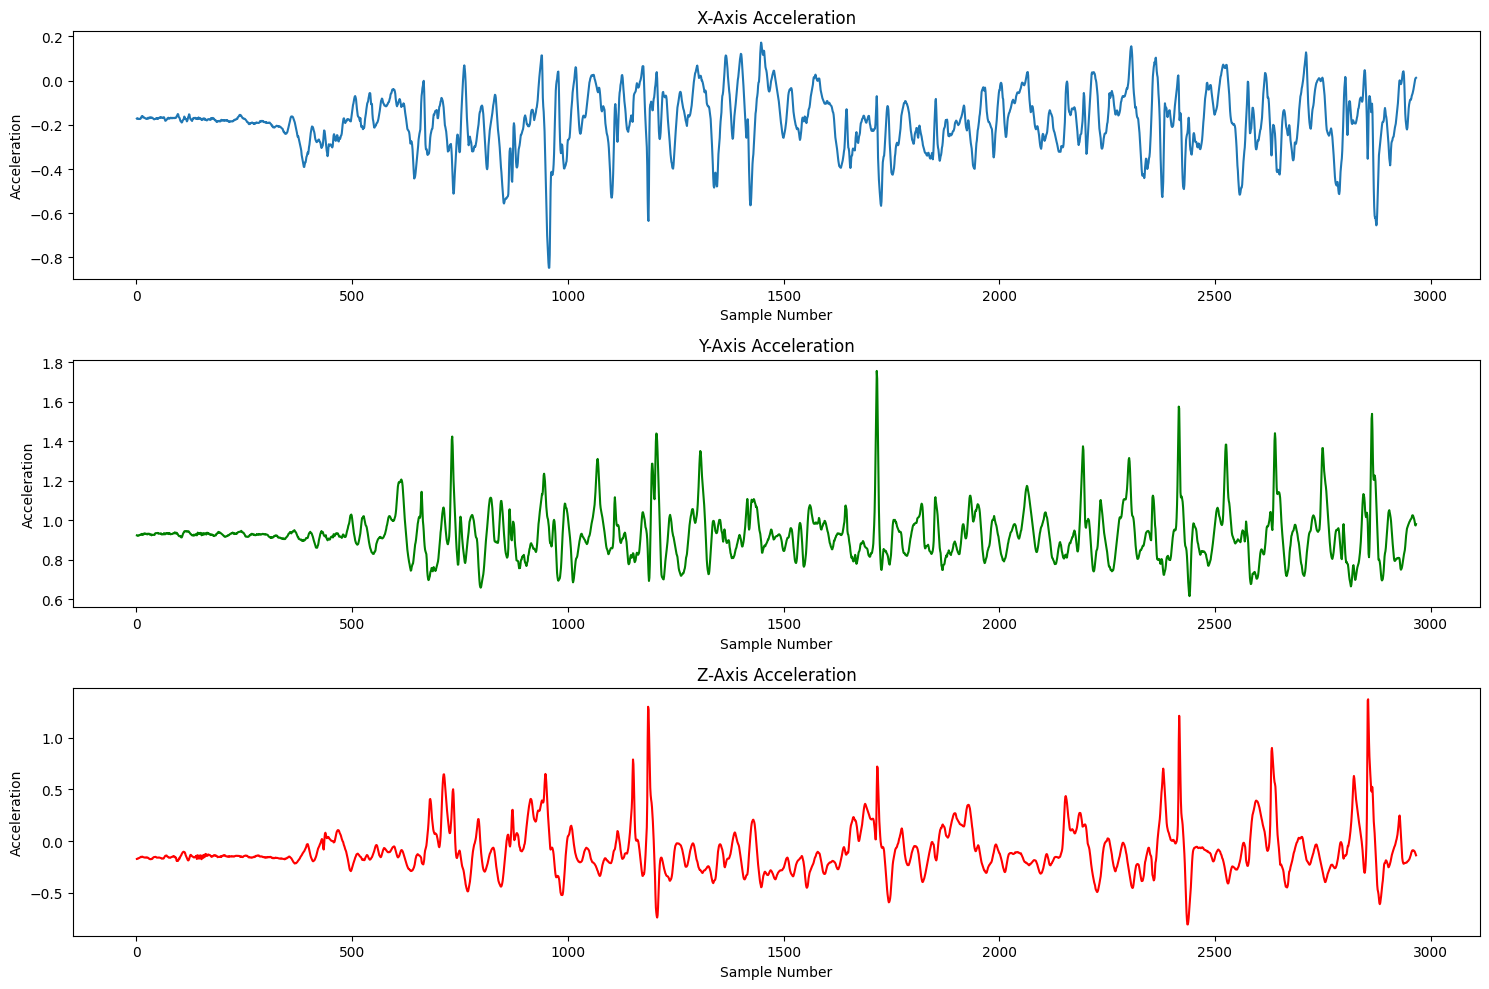

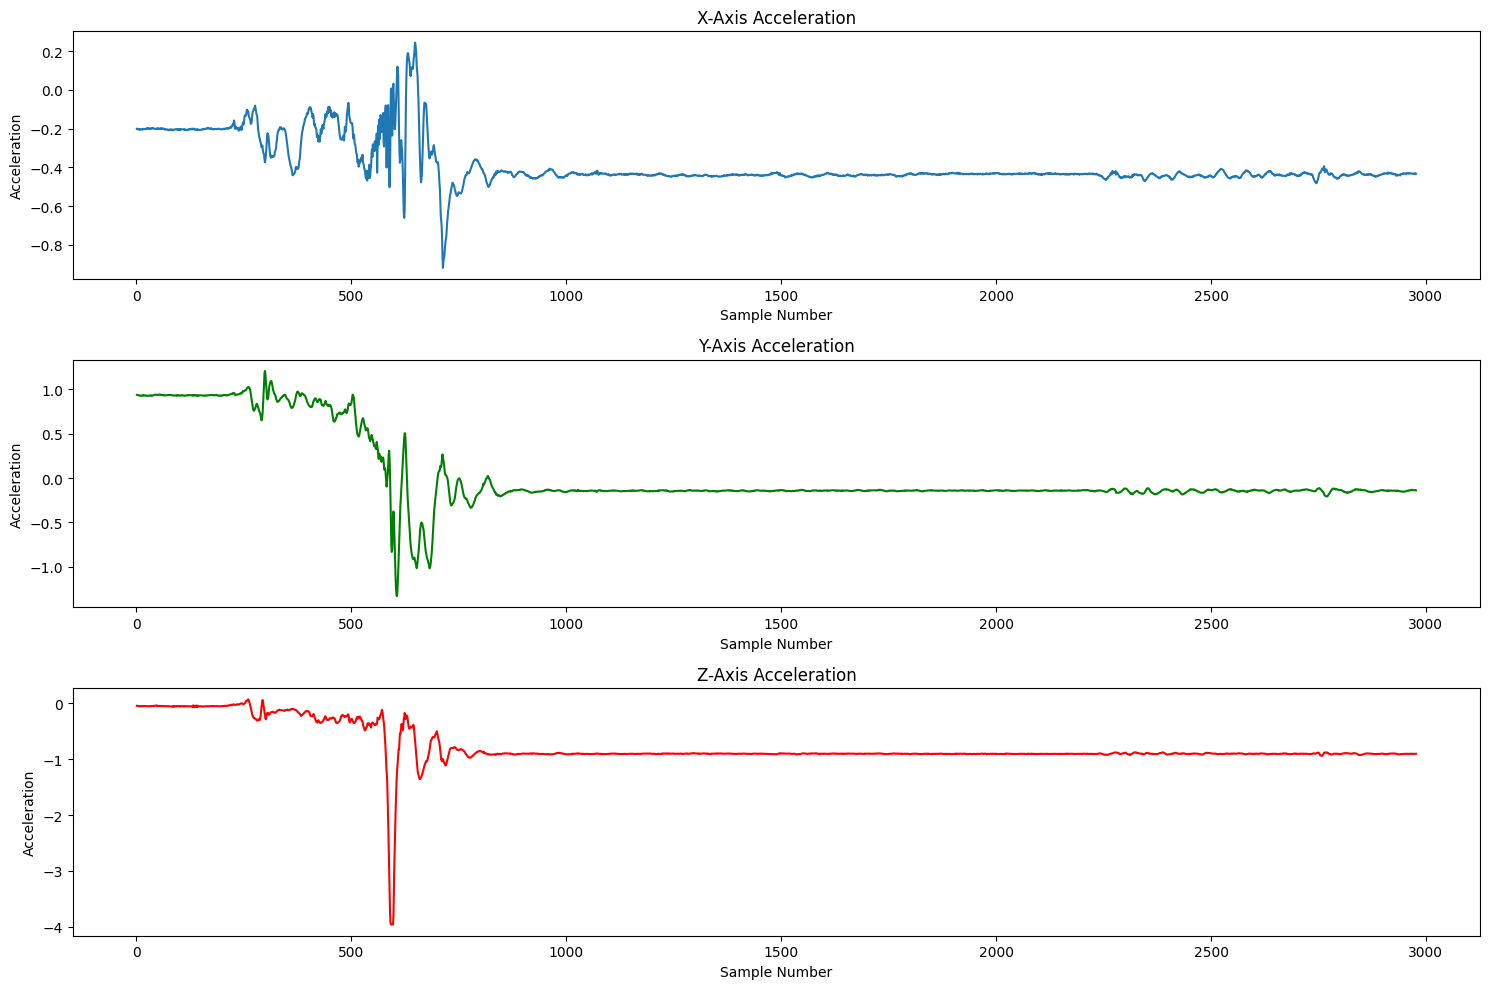

In [17]:
df_adl = load_sensor_data('datasets/UMAFall_Dataset/ADL/UMAFall_Subject_01_ADL_Walking_1_2017-04-14_23-25-52.csv')
df_fall = load_sensor_data('datasets/UMAFall_Dataset/Fall/UMAFall_Subject_02_Fall_backwardFall_1_2016-06-13_20-51-32.csv')

# Process ADL data
acceleration_adl = df_adl[df_adl['Sensor_ID'] == 0]
gyro_adl = df_adl[df_adl['Sensor_ID'] == 1]
plot_sensor_data(acceleration_adl)

# Process Fall data
acceleration_fall = df_fall[df_fall['Sensor_ID'] == 0]
gyro_fall = df_fall[df_fall['Sensor_ID'] == 1]
plot_sensor_data(acceleration_fall)



In [18]:

def process_dataset_directory(directory_path, sensor_types=[0, 1]):
    """
    Process all CSV files in a directory and fix TimeStamp issues
    
    Parameters:
    - directory_path: Path to the dataset directory
    - sensor_types: List of sensor types to extract (0: Accelerometer, 1: Gyroscope)
    
    Returns:
    - Consolidated DataFrame with fixed timestamps and label column
    """
    all_data = []
    
    # Determine label based on directory name
    label = os.path.basename(directory_path)
    
    # Iterate through all CSV files
    for filename in os.listdir(directory_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory_path, filename)
            
            # Load data
            df = load_sensor_data(file_path)
            
            if df is not None:
                # Filter for specific sensor types
                for sensor_type in sensor_types:
                    sensor_data = df[df['Sensor_Type'] == sensor_type].copy()
                    
                    # Convert TimeStamp to datetime
                    sensor_data['TimeStamp'] = pd.to_datetime(sensor_data['TimeStamp'], unit='ms')
                    
                    # Remove duplicate timestamps by averaging
                    sensor_data = sensor_data.groupby('TimeStamp', as_index=False).mean()
                    
                    # Add label column
                    sensor_data['Label'] = label
                    
                    # Add filename and sensor type as metadata
                    sensor_data['Filename'] = filename
                    sensor_data['Sensor_Type_Name'] = 'Accelerometer' if sensor_type == 0 else 'Gyroscope'
                    
                    all_data.append(sensor_data)
    
    # Combine all data
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return None

Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: U

/var/folders/b5/8qvrx5b94rv2txsfvw8tjdj00000gn/T/ipykernel_87100/885362803.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(all_data, ignore_index=True)


Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: Unable to convert column TimeStamp to type float64
Error loading CSV: U

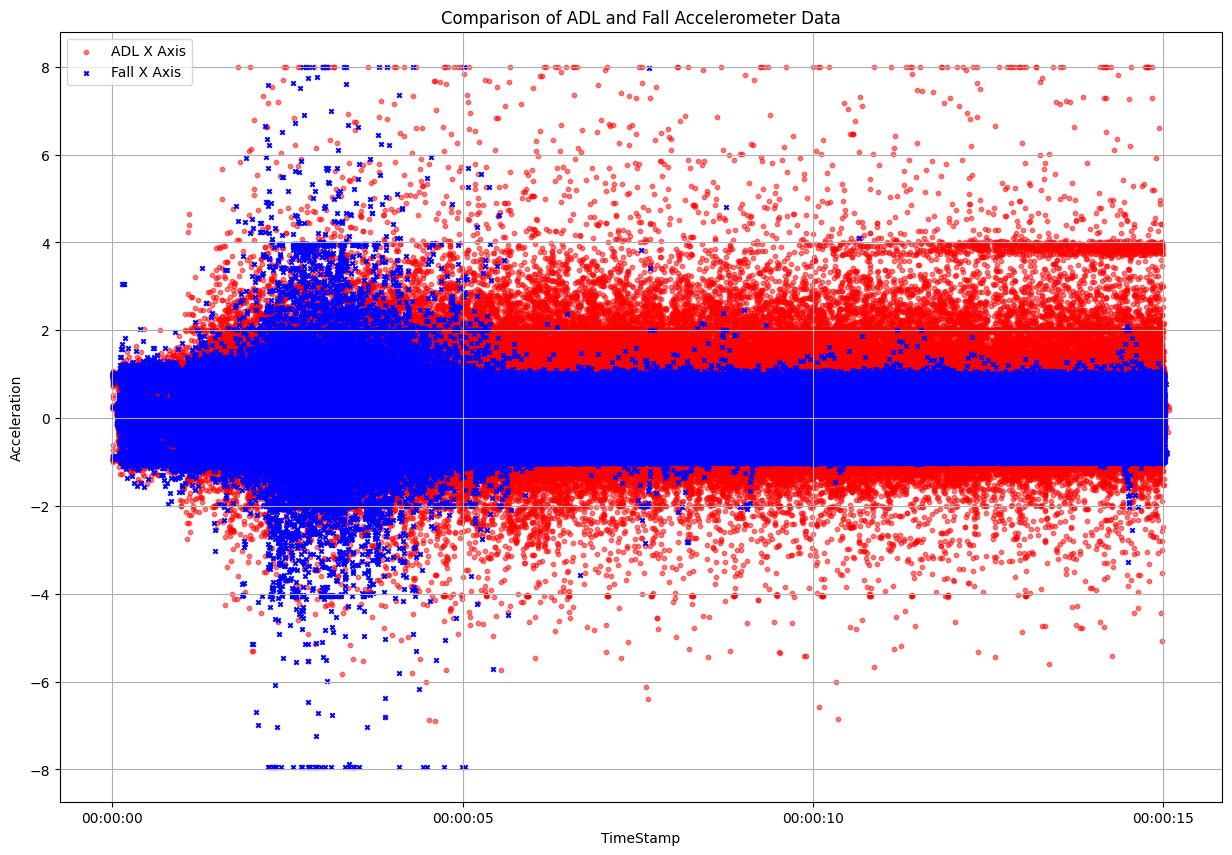

In [19]:
data = process_dataset_directory('datasets/UMAFall_Dataset/')
dataset_dir = "datasets/UMAFall_Dataset"

adl_dir = os.path.join(dataset_dir, 'ADL')
fall_dir = os.path.join(dataset_dir, 'Fall')

adl_data = process_dataset_directory(adl_dir)
fall_data = process_dataset_directory(fall_dir)

adl_accel = adl_data[adl_data['Sensor_Type'] == 0]
fall_accel = fall_data[fall_data['Sensor_Type'] == 0]

# Plotting adl_accel and fall_accel data for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Plot ADL data
plt.scatter(adl_accel['TimeStamp'], adl_accel['X_Axis'], label='ADL X Axis', s=10, c='r', marker='o', alpha=0.5)
# plt.scatter(adl_accel['TimeStamp'], adl_accel['Y_Axis'], label='ADL Y Axis', s=10, c='g', marker='o')
# plt.scatter(adl_accel['TimeStamp'], adl_accel['Z_Axis'], label='ADL Z Axis', s=10, c='b', marker='o')

# Plot Fall data
plt.scatter(fall_accel['TimeStamp'], fall_accel['X_Axis'], label='Fall X Axis', s=10, c='b', marker='x')
# plt.scatter(fall_accel['TimeStamp'], fall_accel['Y_Axis'], label='Fall Y Axis', s=10, c='g', marker='x')
# plt.scatter(fall_accel['TimeStamp'], fall_accel['Z_Axis'], label='Fall Z Axis', s=10, c='b', marker='x')

plt.title('Comparison of ADL and Fall Accelerometer Data')
plt.xlabel('TimeStamp')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()


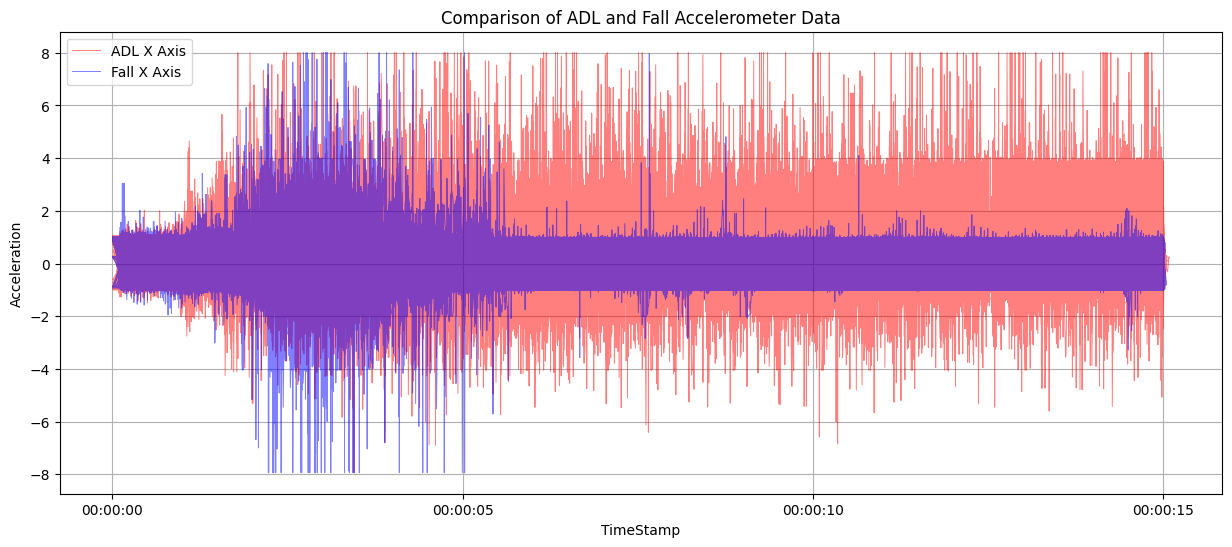

In [20]:
plt.figure(figsize=(15, 6))

# Plot ADL data
plt.plot(adl_accel['TimeStamp'], adl_accel['X_Axis'], label='ADL X Axis', color='r', alpha=0.5, linewidth=0.7)

# Plot Fall data
plt.plot(fall_accel['TimeStamp'], fall_accel['X_Axis'], label='Fall X Axis', color='b', alpha=0.5, linewidth=0.7)

plt.title('Comparison of ADL and Fall Accelerometer Data')
plt.xlabel('TimeStamp')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()

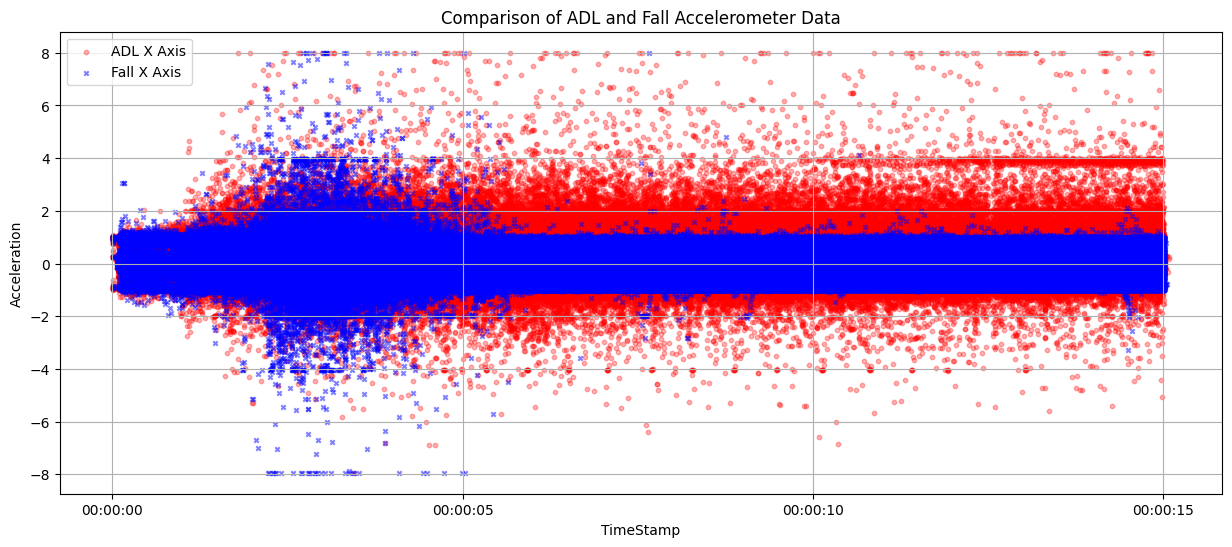

In [21]:
plt.figure(figsize=(15, 6))

# Plot ADL data with transparency
plt.scatter(adl_accel['TimeStamp'], adl_accel['X_Axis'], label='ADL X Axis', s=10, c='r', marker='o', alpha=0.3)

# Plot Fall data with transparency and different marker
plt.scatter(fall_accel['TimeStamp'], fall_accel['X_Axis'], label='Fall X Axis', s=10, c='b', marker='x', alpha=0.5)

plt.title('Comparison of ADL and Fall Accelerometer Data')
plt.xlabel('TimeStamp')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()

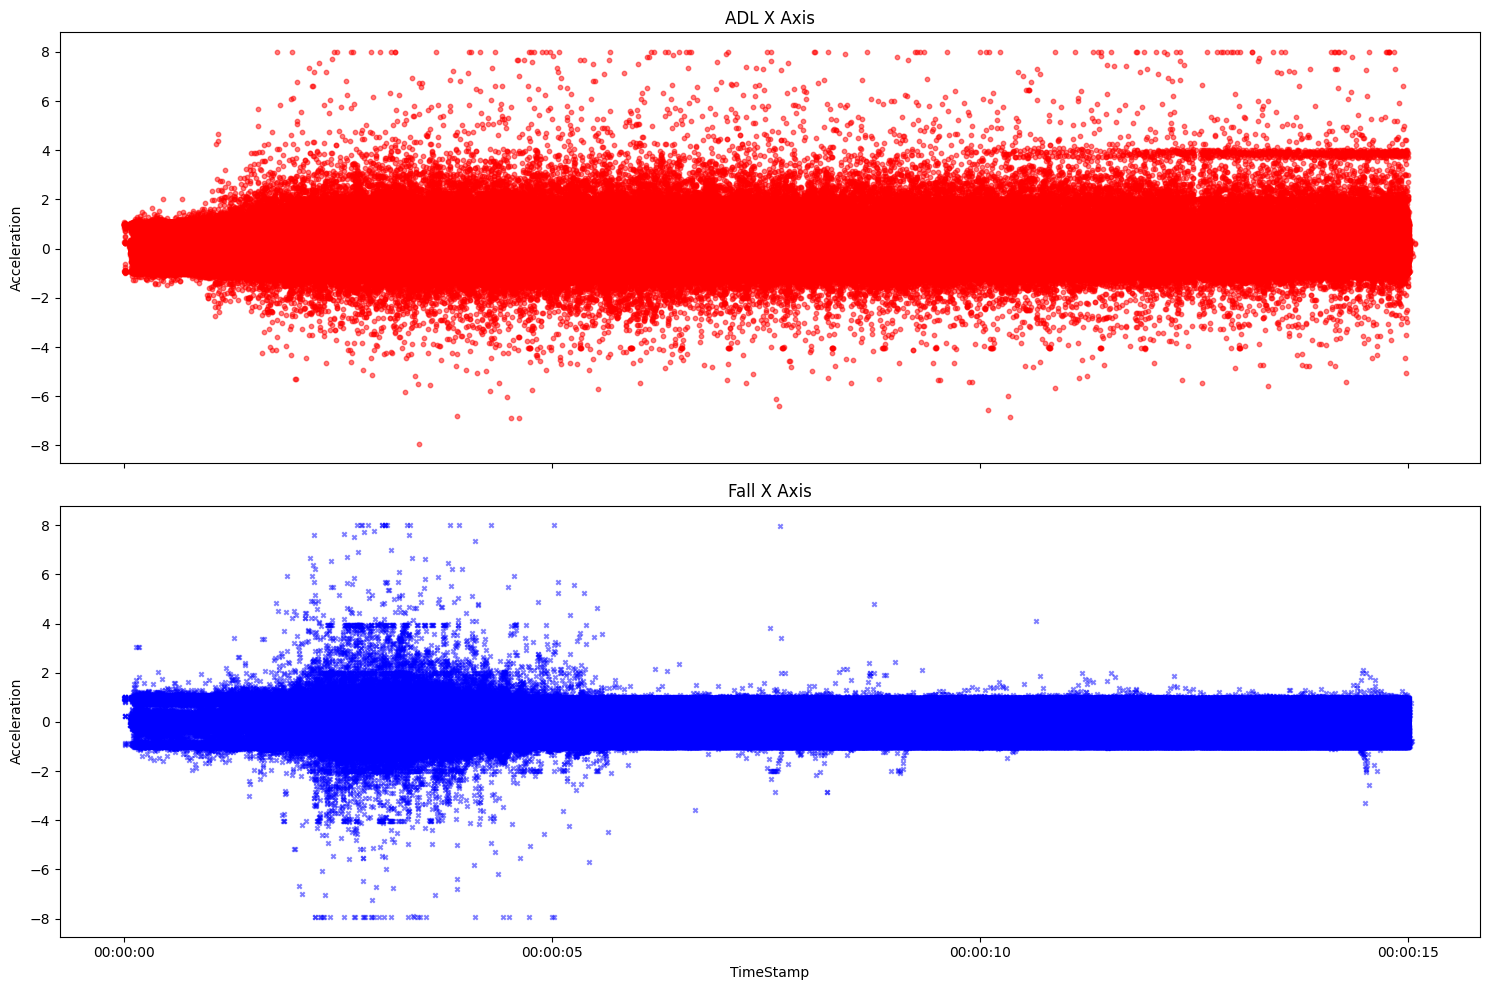

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

ax[0].scatter(adl_accel['TimeStamp'], adl_accel['X_Axis'], s=10, c='r', marker='o', alpha=0.5)
ax[0].set_title('ADL X Axis')
ax[0].set_ylabel('Acceleration')

ax[1].scatter(fall_accel['TimeStamp'], fall_accel['X_Axis'], s=10, c='b', marker='x', alpha=0.5)
ax[1].set_title('Fall X Axis')
ax[1].set_xlabel('TimeStamp')
ax[1].set_ylabel('Acceleration')

plt.tight_layout()
plt.show()

/var/folders/b5/8qvrx5b94rv2txsfvw8tjdj00000gn/T/ipykernel_87100/1108042067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adl_accel['Smoothed'] = adl_accel['X_Axis'].rolling(window=window_size).mean()
/var/folders/b5/8qvrx5b94rv2txsfvw8tjdj00000gn/T/ipykernel_87100/1108042067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_accel['Smoothed'] = fall_accel['X_Axis'].rolling(window=window_size).mean()


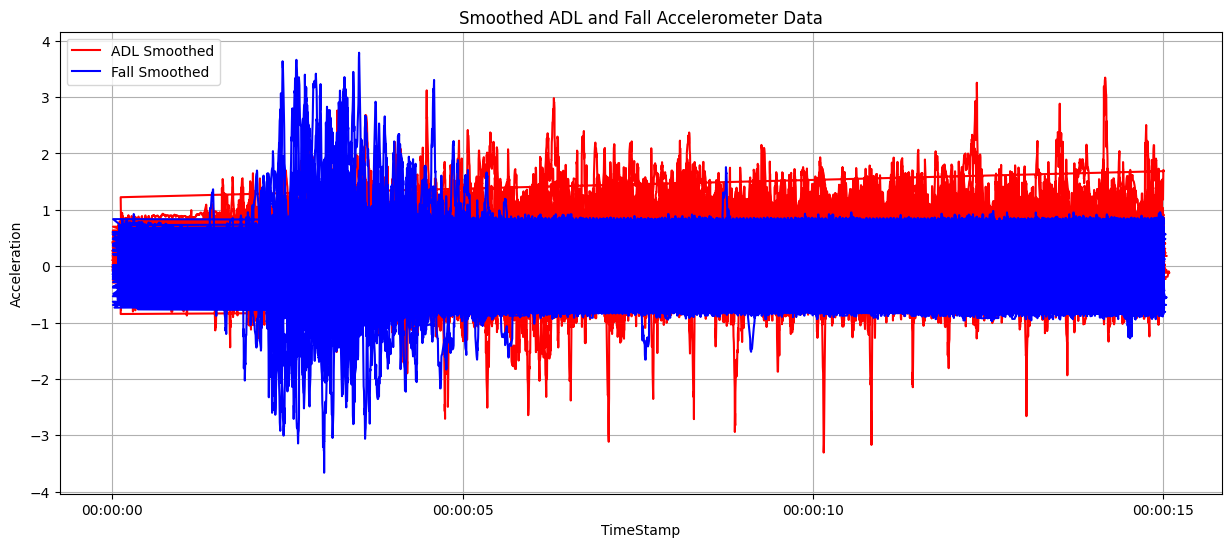

In [23]:
window_size = 10  # Adjust as needed
adl_accel['Smoothed'] = adl_accel['X_Axis'].rolling(window=window_size).mean()
fall_accel['Smoothed'] = fall_accel['X_Axis'].rolling(window=window_size).mean()

plt.figure(figsize=(15, 6))
plt.plot(adl_accel['TimeStamp'], adl_accel['Smoothed'], label='ADL Smoothed', color='r', linewidth=1.5)
plt.plot(fall_accel['TimeStamp'], fall_accel['Smoothed'], label='Fall Smoothed', color='b', linewidth=1.5)

plt.title('Smoothed ADL and Fall Accelerometer Data')
plt.xlabel('TimeStamp')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()

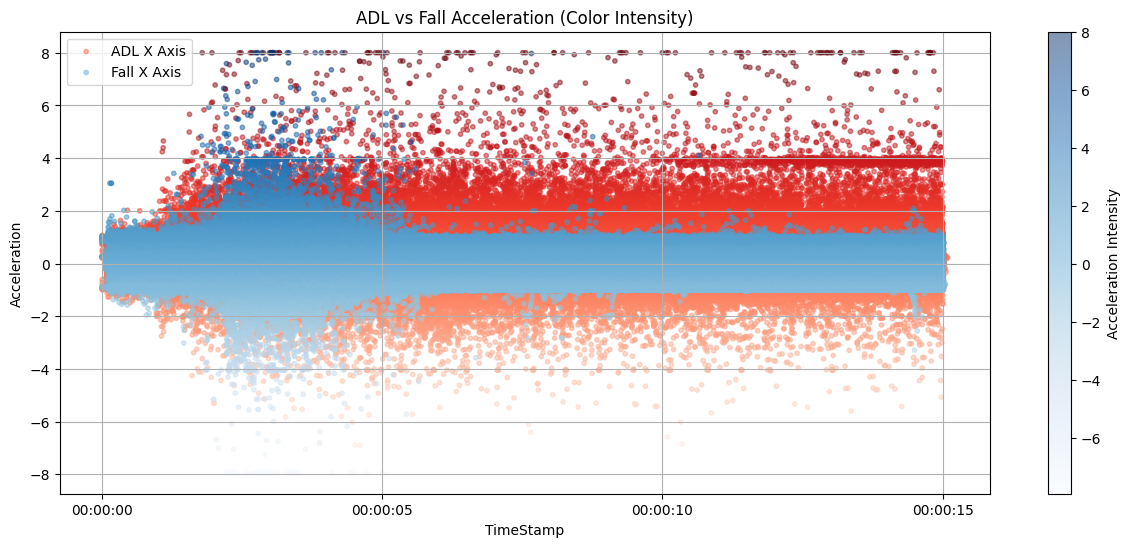

In [24]:
plt.figure(figsize=(15, 6))
plt.scatter(adl_accel['TimeStamp'], adl_accel['X_Axis'], c=adl_accel['X_Axis'], cmap='Reds', s=10, alpha=0.5)
plt.scatter(fall_accel['TimeStamp'], fall_accel['X_Axis'], c=fall_accel['X_Axis'], cmap='Blues', s=10, alpha=0.5)
plt.colorbar(label='Acceleration Intensity')
plt.title('ADL vs Fall Acceleration (Color Intensity)')
plt.xlabel('TimeStamp')
plt.ylabel('Acceleration')
plt.legend(['ADL X Axis', 'Fall X Axis'])
plt.grid(True)
plt.show()

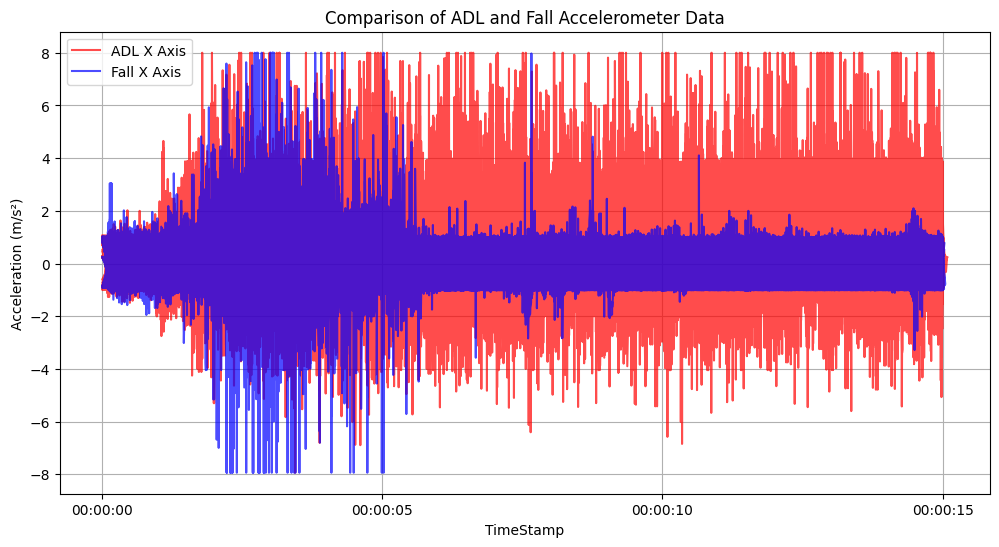

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(adl_accel['TimeStamp'], adl_accel['X_Axis'], label='ADL X Axis', color='red', alpha=0.7)
plt.plot(fall_accel['TimeStamp'], fall_accel['X_Axis'], label='Fall X Axis', color='blue', alpha=0.7)

plt.title('Comparison of ADL and Fall Accelerometer Data')
plt.xlabel('TimeStamp')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/b5/8qvrx5b94rv2txsfvw8tjdj00000gn/T/ipykernel_87100/68681149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adl_accel['X_Axis_Smoothed'] = adl_accel['X_Axis'].rolling(window=window_size).mean()
/var/folders/b5/8qvrx5b94rv2txsfvw8tjdj00000gn/T/ipykernel_87100/68681149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_accel['X_Axis_Smoothed'] = fall_accel['X_Axis'].rolling(window=window_size).mean()


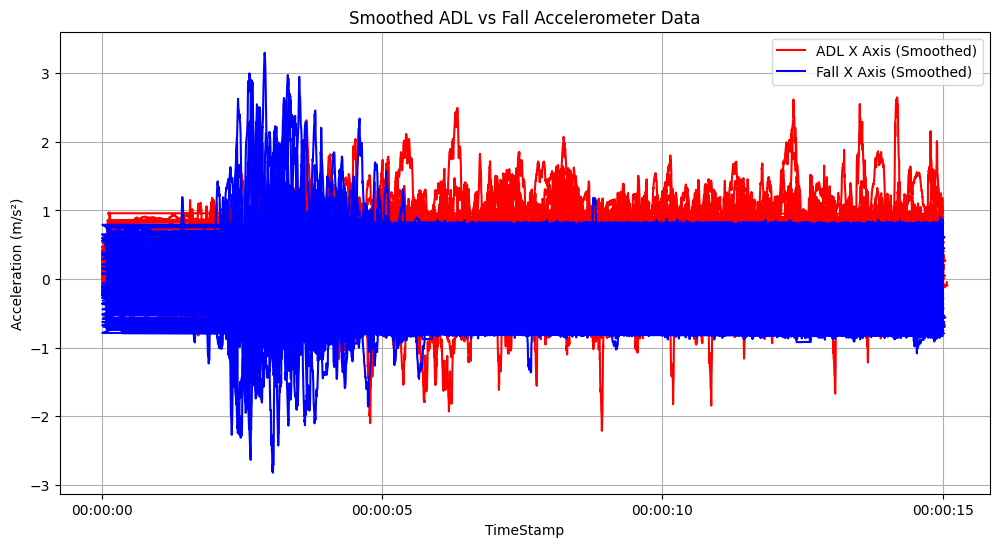

In [27]:
window_size = 20  # Adjust as needed
adl_accel['X_Axis_Smoothed'] = adl_accel['X_Axis'].rolling(window=window_size).mean()
fall_accel['X_Axis_Smoothed'] = fall_accel['X_Axis'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(adl_accel['TimeStamp'], adl_accel['X_Axis_Smoothed'], label='ADL X Axis (Smoothed)', color='red')
plt.plot(fall_accel['TimeStamp'], fall_accel['X_Axis_Smoothed'], label='Fall X Axis (Smoothed)', color='blue')

plt.title('Smoothed ADL vs Fall Accelerometer Data')
plt.xlabel('TimeStamp')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)
plt.show()

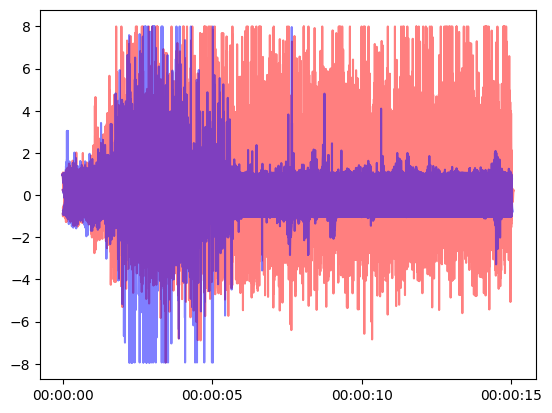

In [28]:
plt.plot(adl_accel['TimeStamp'], adl_accel['X_Axis'], label='ADL X Axis', c='r', alpha=0.5)
plt.plot(fall_accel['TimeStamp'], fall_accel['X_Axis'], label='Fall X Axis', c='b', alpha=0.5)